# MODEL SELECTION

In [54]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.model_selection import learning_curve, ShuffleSplit
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from time import time
import pandas as pd
import numpy as np
% matplotlib inline 
import pickle

## LOAD TRAINING DATA

In [2]:
df = pd.read_csv('https://s3.amazonaws.com/marweezys-bucket/all_state_insurance_prediction/train.csv')
df.drop(labels='id', axis=1, inplace=True)
df = df.ix[:,:]
df.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,A,B,A,B,A,A,A,A,B,A,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,A,B,A,A,A,A,A,A,B,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,A,B,A,A,B,A,A,A,B,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,B,B,A,B,A,A,A,A,B,A,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,A,B,A,B,A,A,A,A,B,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


## ONE HOT ENCODE CATEGORICAL DATA

In [3]:
one_hot_df = pd.get_dummies(df.ix[:,:-1])
one_hot_df.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,...,cat116_P,cat116_Q,cat116_R,cat116_S,cat116_T,cat116_U,cat116_V,cat116_W,cat116_X,cat116_Y
0,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print df.shape
print one_hot_df.shape

(188318, 131)
(188318, 1153)


In [5]:
X = one_hot_df
y = df['loss']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## ALGORITHMS

In [7]:
models = {}
models['Random Forest'] = RandomForestRegressor()
models['Gradient Boost']= GradientBoostingRegressor()

## LEARNING CURVES

In both random forest and gradient boosting algorithms, there is a high variance (overfitting) issues. As a result, there are 3 methods to resolve high variance: obtain more training data, reduce features used to train model, and/or use regularization. I will be reducing features in my "feature selection" notebook. On a final note, I will be using gradient boosting as my algorithm for my model.

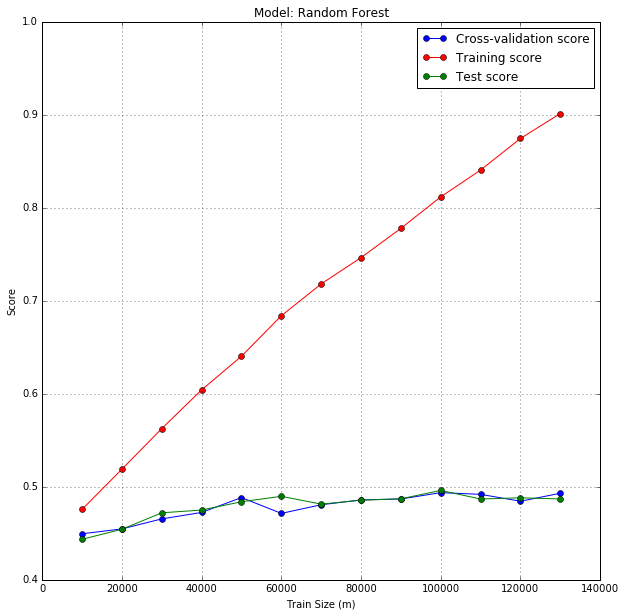

10820.2657049


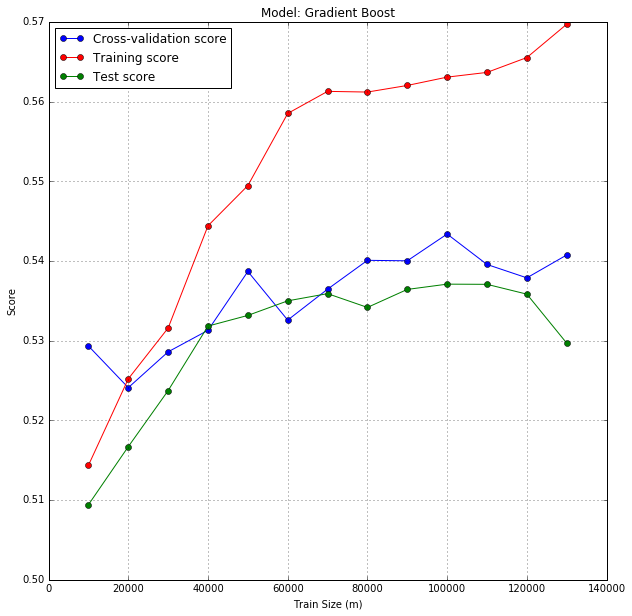

23733.842417


In [8]:
for name,model in models.items():
    start = time()
    train_sizes = []
    val_scores = []
    train_scores = []
    test_scores = []
    plt.figure(figsize=(10,10))
    for m in range(10000,131000,10000):
        XX_train = X_train.iloc[:m,:]
        yy_train = y_train.iloc[:m]
        results = model.fit(XX_train,yy_train)
        val_scores.append(np.mean(cross_val_score(model,XX_train,yy_train,cv=10)))
        train_scores.append(model.score(X_train,y_train))
        test_scores.append(model.score(X_test,y_test))
        train_sizes.append(m)
    plt.plot(train_sizes, val_scores,   'o-', color="b", label='Cross-validation score')
    plt.plot(train_sizes, train_scores, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores,  'o-', color="g", label="Test score")
    plt.title('Model: {}'.format(name))
    plt.xlabel('Train Size (m)')
    plt.ylabel('Score')
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()
    print time()-start

In [9]:
# def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
#     plt.figure()
#     plt.title(title)
#     if ylim is not None:
#         plt.ylim(*ylim)
#     plt.xlabel("Training examples")
#     plt.ylabel("Score")
#     train_sizes, train_scores, test_scores = learning_curve(
#         estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
#     plt.grid()
# #     plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
# #                      train_scores_mean + train_scores_std, alpha=0.1,
# #                      color="r")
# #     plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
# #                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
#     plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
#              label="Training score")
#     plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
#              label="Cross-validation score")
#     plt.legend(loc="best")
#     return plt

In [10]:
# for name,model in models.items():
# #     results = model.fit(X_train,y_train)
# #     y_pred = results.predict(X_test)
# #     val_score = np.mean(cross_val_score(model,X_train,y_train,cv=10))
#     cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)   
#     plot_learning_curve(estimator=model,title=name,X=X,y=y,cv=cv,n_jobs=4)
#     plt.show()